# 0. Setup Paths

In [1]:
!py -0


 (venv)
 -3.7-64


Installed Pythons found by py Launcher for Windows *



In [144]:
import os

In [145]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [146]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [147]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [148]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [149]:
# https://www.tensorflow.org/install/source_windows

In [150]:
if os.name=='nt':
    !pip install wget
    import wget

You should consider upgrading via the 'c:\users\cashi\onedrive\documents\project\tfodcourse\tfod\scripts\python.exe -m pip install --upgrade pip' command.


In [113]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [50]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

 70% [....................................................                      ] 1040384 / 1468733

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-37: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-37: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-37: module MAY be using inspect.stack
error: avro-python3 1.10.2 is installed but avro-python3!=1.9.2,<1.10.0,>=1.8.1 is required by {'apache-beam'}


copying build\lib\object_detection\utils\model_util_tf2_test.py -> build\bdist.win-amd64\egg\object_detection\utils
copying build\lib\object_detection\utils\np_box_list.py -> build\bdist.win-amd64\egg\object_detection\utils
copying build\lib\object_detection\utils\np_box_list_ops.py -> build\bdist.win-amd64\egg\object_detection\utils
copying build\lib\object_detection\utils\np_box_list_ops_test.py -> build\bdist.win-amd64\egg\object_detection\utils
copying build\lib\object_detection\utils\np_box_list_test.py -> build\bdist.win-amd64\egg\object_detection\utils
copying build\lib\object_detection\utils\np_box_mask_list.py -> build\bdist.win-amd64\egg\object_detection\utils
copying build\lib\object_detection\utils\np_box_mask_list_ops.py -> build\bdist.win-amd64\egg\object_detection\utils
copying build\lib\object_detection\utils\np_box_mask_list_ops_test.py -> build\bdist.win-amd64\egg\object_detection\utils
copying build\lib\object_detection\utils\np_box_mask_list_test.py -> build\bdist.w

Obtaining file:///C:/Users/cashi/OneDrive/Documents/Project/TFODCourse/Tensorflow/models/research/slim
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


You should consider upgrading via the 'c:\users\cashi\onedrive\documents\project\tfodcourse\tfod\scripts\python.exe -m pip install --upgrade pip' command.


In [51]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-09-03 23:05:35.405066: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-09-03 23:05:35.405090: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running tests under Python 3.7.0: C:\Users\cashi\OneDrive\Documents\Project\TFODCourse\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-09-03 23:05:37.230504: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-09-03 23:05:37.255910: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.702GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2021-09-03 23:05:37.256441: W tensorflow/stream_e

In [12]:
!pip install Pillow

In [13]:
!pip install pyyaml

In [14]:
!pip install tensorflow --upgrade

^C


In [15]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.17.3
Uninstalling protobuf-3.17.3:
  Successfully uninstalled protobuf-3.17.3
Found existing installation: matplotlib 3.2.0
Uninstalling matplotlib-3.2.0:
  Successfully uninstalled matplotlib-3.2.0
  Using cached protobuf-3.17.3-cp37-cp37m-win_amd64.whl (909 kB)
  Using cached matplotlib-3.2.0-cp37-cp37m-win_amd64.whl (9.2 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.4.0 requires attrs>=18.1.0, which is not installed.
tensorflow-datasets 4.4.0 requires importlib-resources, which is not installed.
tensorflow-datasets 4.4.0 requires promise, which is not installed.
tensorflow-datasets 4.4.0 requires tensorflow-metadata, which is not installed.
tensorflow-datasets 4.4.0 requires tqdm, which is not installed.
tensorflow 2.5.0 requires grpcio~=1.34.0, but you have grpcio 1.32.0 which is incompatible.
tensorflow 2.5.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
tensorflow 2.5.0 requires tensorflow-estimator<2.6.0,>=2.5.0rc0, but you have tensorflow-estimator 2.4.0 which is incompatible.
apache-beam 2.31.0 requires avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you have avro-python3 1.10.2 which is incompatible.


In [16]:
!pip install matplotlib==3.2

In [151]:
import object_detection

In [152]:
!pip list

Package                       Version             Location
----------------------------- ------------------- ------------------------------------------------------------------------------------
absl-py                       0.13.0
apache-beam                   2.31.0
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
cached-property               1.5.2
cachetools                    4.2.2
certifi                       2021.5.30
charset-normalizer            2.0.4
colorama                      0.4.4
contextlib2                   21.6.0
crcmod                        1.7
cycler                        0.10.0
Cython                        0.29.24
debugpy                       1.4.1
decorator                     5.0.9
dill                          0.3.1.1
fastavro                      1.4.4
flatbuffers                   1.12
future                        0.18.2
gast                          0.4.0
gin-config                    0.1.1
goo

You should consider upgrading via the 'c:\users\cashi\onedrive\documents\project\tfodcourse\tfod\scripts\python.exe -m pip install --upgrade pip' command.


scipy                         1.7.1
sentencepiece                 0.1.96
seqeval                       1.2.2
setuptools                    57.4.0
six                           1.15.0
slim                          0.1                 c:\users\cashi\onedrive\documents\project\tfodcourse\tensorflow\models\research\slim
tensorboard                   2.6.0
tensorboard-data-server       0.6.1
tensorboard-plugin-wit        1.8.0
tensorflow                    2.5.0
tensorflow-addons             0.13.0
tensorflow-datasets           4.4.0
tensorflow-estimator          2.6.0
tensorflow-hub                0.12.0
tensorflow-model-optimization 0.6.0
termcolor                     1.1.0
tf-models-official            2.5.1
tf-slim                       1.1.0
tornado                       6.1
traitlets                     5.0.5
typeguard                     2.12.1
typing-extensions             3.7.4.3
urllib3                       1.26.6
wcwidth                       0.2.5
Werkzeug                      

In [54]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

  3% [..                                                                      ]   761856 / 20515344

  9% [......                                                                  ]  1982464 / 20515344

 17% [............                                                            ]  3489792 / 20515344

 25% [..................                                                      ]  5136384 / 20515344

 34% [........................                                                ]  7028736 / 20515344

 43% [...............................                                         ]  8929280 / 20515344

 57% [.........................................                               ] 11878400 / 20515344

 67% [................................................                        ] 13934592 / 20515344

 80% [.........................................................               ] 16424960 / 20515344

 87% [..............................................................          ] 17858560 / 20515344

100% [........................................................................] 20515344 / 20515344

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [55]:
labels = [{'name':'COKE', 'id':1}, {'name':'SB', 'id':2}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [12]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [58]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [59]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [21]:
!pip install pytz

You should consider upgrading via the 'c:\users\cashi\onedrive\documents\project\tfodcourse\tfod\scripts\python.exe -m pip install --upgrade pip' command.


# 4. Copy Model Config to Training Folder

In [60]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [61]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [62]:
print(tf.__version__)

2.5.0


In [63]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [64]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [65]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [66]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [67]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [68]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [69]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [25]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [21]:
!{command}

^C


# 7. Evaluate the Model

In [70]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [71]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [28]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [153]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [154]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [155]:
def distance_finder(focal_length, real_height, height_in_frame):
    distance = (real_height*focal_length)/height_in_frame
    return distance

# 9. Detect from an Image

In [156]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [157]:
print(cv2.__version__)

4.5.3


In [158]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [159]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'COKE.4401cc00-0d01-11ec-b94c-6018953ad33a.jpg')

In [160]:
IMAGE_PATH

'Tensorflow\\workspace\\images\\test\\COKE.4401cc00-0d01-11ec-b94c-6018953ad33a.jpg'

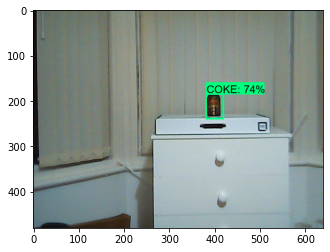

In [161]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [162]:
boxes = np.squeeze(detections['detection_boxes'])
scores = np.squeeze(detections['detection_scores'])
#set a min thresh score, say 0.8
min_score_thresh = 0.5
bboxes = boxes[scores > min_score_thresh]

#get image size
im_height, im_width, dim = np.shape(img)
print(bboxes)
final_box = []
for box in bboxes:
    ymin, xmin, ymax, xmax = box
    final_box.append([xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height])
print(ymin)
print(ymax*im_height - ymin*im_height)
print(xmax*im_width - xmin*im_width)
# pixel_height = (ymax*im_height - ymin*im_height)*0.2645833333**2
# print(pixel_height)

[[0.3855834  0.59661275 0.49659967 0.65693086]]
0.3855834
53.287811279296875
38.60359191894531


In [163]:
image_real_height = ymax*im_height - ymin*im_height
print(image_real_height)
real_distance = 185
print(image_real_height*real_distance/11.5)
print(np.round(image_real_height*real_distance/11.5))

53.287811279296875
857.2387031886889
857.0


In [164]:
focal_length = 871
image_real_height = ymax*im_height - ymin*im_height
print(image_real_height)
# real_distance = 124
# print(image_real_height*real_distance/12)
print(np.round(focal_length*11.5/image_real_height))

53.287811279296875
188.0


In [165]:
# distance_finder(150, 24, pixel_height)

# 10. Real Time Detections from your Webcam

In [47]:
!pip uninstall opencv-python-headless -y

Found existing installation: opencv-python-headless 4.5.3.56
Uninstalling opencv-python-headless-4.5.3.56:
  Successfully uninstalled opencv-python-headless-4.5.3.56


# Distance Measurement from three cameras

In [26]:
# cap_1 = cv2.VideoCapture(0)
# cap_2 = cv2.VideoCapture(1)
# cap_3 = cv2.VideoCapture(2)

# heights = []

# width = int(cap_1.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap_1.get(cv2.CAP_PROP_FRAME_HEIGHT))

# while True:
#     ret1, frame1 = cap_1.read()
#     ret2, frame2 = cap_2.read()
#     if (ret1):
#         image_np_1 = np.array(frame1)
        
#         input_tensor_1 = tf.convert_to_tensor(np.expand_dims(image_np_1, 0), dtype=tf.float32)
#         detections_1 = detect_fn(input_tensor_1)
    
#         num_detections_1 = int(detections_1.pop('num_detections'))
#         detections_1 = {key: value[0, :num_detections_1].numpy()
#                       for key, value in detections_1.items()}
#         detections_1['num_detections'] = num_detections_1

#         # detection_classes should be ints.
#         detections_1['detection_classes'] = detections_1['detection_classes'].astype(np.int64)

#         label_id_offset = 1
#         image_np_with_detections_1 = image_np_1.copy()

#         viz_utils.visualize_boxes_and_labels_on_image_array(
#                     image_np_with_detections_1,
#                     detections_1['detection_boxes'],
#                     detections_1['detection_classes']+label_id_offset,
#                     detections_1['detection_scores'],
#                     category_index,
#                     use_normalized_coordinates=True,
#                     max_boxes_to_draw=1,
#                     min_score_thresh=.2,
#                     agnostic_mode=False)
#         cv2.imshow('object detection_1',  cv2.resize(image_np_with_detections_2, (800, 600)))
        
#         boxes_1 = np.squeeze(detections_1['detection_boxes'])
#         scores_1 = np.squeeze(detections_1['detection_scores'])
#         #set a min thresh score, say 0.8
#         min_score_thresh_1 = 0.8
#         bboxes_1 = boxes_1[scores_1 > min_score_thresh_1]

#         #get image size
#         im_height, im_width, dim = np.shape(img)
#         print(bboxes)
#         final_box = []
#         for box in bboxes:
#             ymin, xmin, ymax, xmax = box
#             final_box.append([xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height])
#         image_real_height_1 =ymax*im_height - ymin*im_height
#         heights.append[image_real_height_1]
#     if (ret2):
#         image_np_2 = np.array(frame2)
        
#         input_tensor_2 = tf.convert_to_tensor(np.expand_dims(image_np_2, 0), dtype=tf.float32)
#         detections_2 = detect_fn(input_tensor_2)
    
#         num_detections_2 = int(detections_2.pop('num_detections'))
#         detections_2 = {key: value[0, :num_detections_2].numpy()
#                       for key, value in detections_2.items()}
#         detections_2['num_detections'] = num_detections_2

#         # detection_classes should be ints.
#         detections_2['detection_classes'] = detections_2['detection_classes'].astype(np.int64)

#         label_id_offset = 1
#         image_np_with_detections_2 = image_np_2.copy()

#         viz_utils.visualize_boxes_and_labels_on_image_array(
#                     image_np_with_detections_2,
#                     detections_2['detection_boxes'],
#                     detections_2['detection_classes']+label_id_offset,
#                     detections_2['detection_scores'],
#                     category_index,
#                     use_normalized_coordinates=True,
#                     max_boxes_to_draw=1,
#                     min_score_thresh=.2,
#                     agnostic_mode=False)
#         cv2.imshow('object detection_2',  cv2.resize(image_np_with_detections_2, (800, 600)))
#         boxes_2 = np.squeeze(detections_2['detection_boxes'])
#         scores_2 = np.squeeze(detections_2['detection_scores'])
#         #set a min thresh score, say 0.8
#         min_score_thresh_2 = 0.8
#         bboxes_2 = boxes_2[scores_2 > min_score_thresh_2]

#         #get image size
#         im_height, im_width, dim = np.shape(img)
#         print(bboxes)
#         final_box = []
#         for box in bboxes_2:
#             ymin, xmin, ymax, xmax = box
#             final_box.append([xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height])
#         image_real_height_2 =ymax*im_height - ymin*im_height
#         heights.append(image_real_height_2)
#     if (ret3):
#         image_np_3 = np.array(frame3)
        
#         input_tensor_3 = tf.convert_to_tensor(np.expand_dims(image_np_3, 0), dtype=tf.float32)
#         detections_3 = detect_fn(input_tensor_3)
    
#         num_detections_3 = int(detections_3.pop('num_detections'))
#         detections_3 = {key: value[0, :num_detections_3].numpy()
#                       for key, value in detections_1.items()}
#         detections_3['num_detections'] = num_detections_3

#         # detection_classes should be ints.
#         detections_3['detection_classes'] = detections_3['detection_classes'].astype(np.int64)

#         label_id_offset = 1
#         image_np_with_detections_3 = image_np_3.copy()

#         viz_utils.visualize_boxes_and_labels_on_image_array(
#                     image_np_with_detections_3,
#                     detections_3['detection_boxes'],
#                     detections_3['detection_classes']+label_id_offset,
#                     detections_3['detection_scores'],
#                     category_index,
#                     use_normalized_coordinates=True,
#                     max_boxes_to_draw=1,
#                     min_score_thresh=.2,
#                     agnostic_mode=False)
#         cv2.imshow('object detection_3',  cv2.resize(image_np_with_detections_3, (800, 600)))
        
#         boxes_3 = np.squeeze(detections_3['detection_boxes'])
#         scores_3 = np.squeeze(detections_3['detection_scores'])
#         #set a min thresh score, say 0.8
#         min_score_thresh_3 = 0.8
#         bboxes_3 = boxes_3[scores_3 > min_score_thresh_3]

#         #get image size
#         im_height, im_width, dim = np.shape(img)
#         print(bboxes)
#         final_box = []
#         for box in bboxes:
#             ymin, xmin, ymax, xmax = box
#             final_box.append([xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height])
#         image_real_height_1 =ymax*im_height - ymin*im_height
#         heights.append[image_real_height_1]
#     print(heights)
#     heights.clear()
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         cap_1.release()
#         cap_2.release()
#         cv2.destroyAllWindows()

#         break




# Distance measurement using single camera

In [170]:
cap_1 = cv2.VideoCapture(1)

width = int(cap_1.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap_1.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap_1.isOpened(): 
    ret_1, frame_1 = cap_1.read()
        
    image_np = np.array(frame_1)
        
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=1,
                min_score_thresh=.2,
                agnostic_mode=False)
    boxes = np.squeeze(detections['detection_boxes'])
    scores = np.squeeze(detections['detection_scores'])
    #set a min thresh score, say 0.8
    min_score_thresh = 0.8
    bboxes = boxes[scores > min_score_thresh]

    #get image size
    im_height, im_width, dim = np.shape(img)
    print(bboxes)
    final_box = []
    for box in bboxes:
        ymin, xmin, ymax, xmax = box
        final_box.append([xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height])
    image_real_height =ymax*im_height - ymin*im_height
    focal_length = 867
    # image_real_height = ymax*im_height - ymin*im_height
    # print(image_real_height)
    # real_distance = 124
    # print(image_real_height*real_distance/26.5)
    distance_output = focal_length*11.5/image_real_height
    print("Distance between the object and the camera is %s"%distance_output)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap_1.release()
        cv2.destroyAllWindows()
        break

[]
Distance between the object and the camera is 188.37648330691874
[]
Distance between the object and the camera is 188.37648330691874
[]
Distance between the object and the camera is 188.37648330691874
[]
Distance between the object and the camera is 188.37648330691874
[]
Distance between the object and the camera is 188.37648330691874
[]
Distance between the object and the camera is 188.37648330691874
[]
Distance between the object and the camera is 188.37648330691874
[]
Distance between the object and the camera is 188.37648330691874
[]
Distance between the object and the camera is 188.37648330691874
[]
Distance between the object and the camera is 188.37648330691874
[]
Distance between the object and the camera is 188.37648330691874
[]
Distance between the object and the camera is 188.37648330691874
[]
Distance between the object and the camera is 188.37648330691874
[]
Distance between the object and the camera is 188.37648330691874
[]
Distance between the object and the camera is

In [47]:
focal_length_mm = 24
real_object_height = 110
# distance_mm = object_real_world_mm * focal_length_mm / object_image_sensor_mm
distance_m = real_object_height * focal_length_mm/pixel_height
print(distance_m)

NameError: name 'pixel_height' is not defined

In [101]:
# from scipy import linalg
# x1, x2, x3 = 0,0,100
# y1, y2, y3 = 0,100,50
# array_1 = np.array([[x3 - x1, y3 - y1],[x3 - x2, y3 - y2]])
# r1, r2, r3 = 20,70, 50
# array_2 = np.array([[(r1**2 - r3**2) - (x1**2 - x3**2) - (y1**2 - y3**2)],[(r1**2 - r3**2) - (x1**2 - x3**2) - (y1**2 - y3**2)]])
# coord = np.invert(array_1)
# print(array_2)
# np.matmul(coord, array_2)

[[10400]
 [10400]]


array([[-1580800],
       [ -540800]])

# 10. Freezing the Graph

In [171]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [172]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [173]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [174]:
!{command}

2021-09-05 23:26:45.084449: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-09-05 23:26:45.084472: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-09-05 23:26:50.098800: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-09-05 23:26:50.127373: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.702GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2021-09-05 23:26:50.127941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-09-05 23:26:50.128352: W tensorflow/stre

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [175]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [176]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [177]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [178]:
!{command}

2021-09-05 23:29:01.577647: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-09-05 23:29:01.577671: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-09-05 23:29:03.593490: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-09-05 23:29:03.619571: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.702GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2021-09-05 23:29:03.620206: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-09-05 23:29:03.620733: W tensorflow/stre

I0905 23:29:25.856631 24136 builder_impl.py:775] Assets written to: Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\assets


In [179]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [180]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [181]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [182]:
!{command}

2021-09-05 23:29:54.079319: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-09-05 23:29:54.079343: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-09-05 23:29:55.853779: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-09-05 23:29:55.878203: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.702GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2021-09-05 23:29:55.878769: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-09-05 23:29:55.879189: W tensorflow/stre

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')